In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
# Define the base directory
base_dir = r"c:\Users\layat\Desktop\LeadFL\Visualize Data\leadfl_simulation_results"

# Define all folder names (updated to match actual folder structure)
folders = [
    "ldp_iid",
    "ldp_noniid", 
    "my_leadfl_iid",
    "my_leadfl_non_iid",
    "None_iid",
    "None_non_iid",
    "orgleadfl_iid",
    "org_leadfl_noniid",
    "wbc_iid",
    "wbc_noniid",
    "orgleadfl_iid_alpha02",
    "orgleadfl_iid_alpha06" 
]

# Dictionary to store all dataframes
federator_dataframes = {}

# Read federator.csv from each folder
for folder in folders:
    federator_path = os.path.join(base_dir, folder, "Final", "federator.csv")
    
    if os.path.exists(federator_path):
        try:
            df = pd.read_csv(federator_path)
            
            # Special handling for org_leadfl_noniid - keep only first 40 rows if needed
            if folder == "org_leadfl_noniid" and len(df) > 40:
                df = df.head(40)
                print(f"✓ Successfully loaded {folder}/Final/federator.csv - Truncated to first 40 rows - Shape: {df.shape}")
            else:
                print(f"✓ Successfully loaded {folder}/Final/federator.csv - Shape: {df.shape}")
            
            federator_dataframes[folder] = df
            
        except Exception as e:
            print(f"✗ Error loading {folder}/Final/federator.csv: {e}")
    else:
        print(f"✗ File not found: {federator_path}")

print(f"\nTotal dataframes loaded: {len(federator_dataframes)}")
print(f"Available dataframes: {list(federator_dataframes.keys())}")

✓ Successfully loaded ldp_iid/Final/federator.csv - Shape: (40, 15)
✓ Successfully loaded ldp_noniid/Final/federator.csv - Shape: (40, 15)
✓ Successfully loaded my_leadfl_iid/Final/federator.csv - Shape: (40, 15)
✓ Successfully loaded my_leadfl_non_iid/Final/federator.csv - Shape: (40, 15)
✓ Successfully loaded None_iid/Final/federator.csv - Shape: (40, 15)
✓ Successfully loaded None_non_iid/Final/federator.csv - Shape: (40, 15)
✓ Successfully loaded orgleadfl_iid/Final/federator.csv - Shape: (40, 15)
✓ Successfully loaded org_leadfl_noniid/Final/federator.csv - Truncated to first 40 rows - Shape: (40, 15)
✓ Successfully loaded wbc_iid/Final/federator.csv - Shape: (40, 15)
✓ Successfully loaded wbc_noniid/Final/federator.csv - Shape: (40, 15)
✓ Successfully loaded orgleadfl_iid_alpha02/Final/federator.csv - Shape: (40, 15)
✓ Successfully loaded orgleadfl_iid_alpha06/Final/federator.csv - Shape: (40, 15)

Total dataframes loaded: 12
Available dataframes: ['ldp_iid', 'ldp_noniid', 'my_le

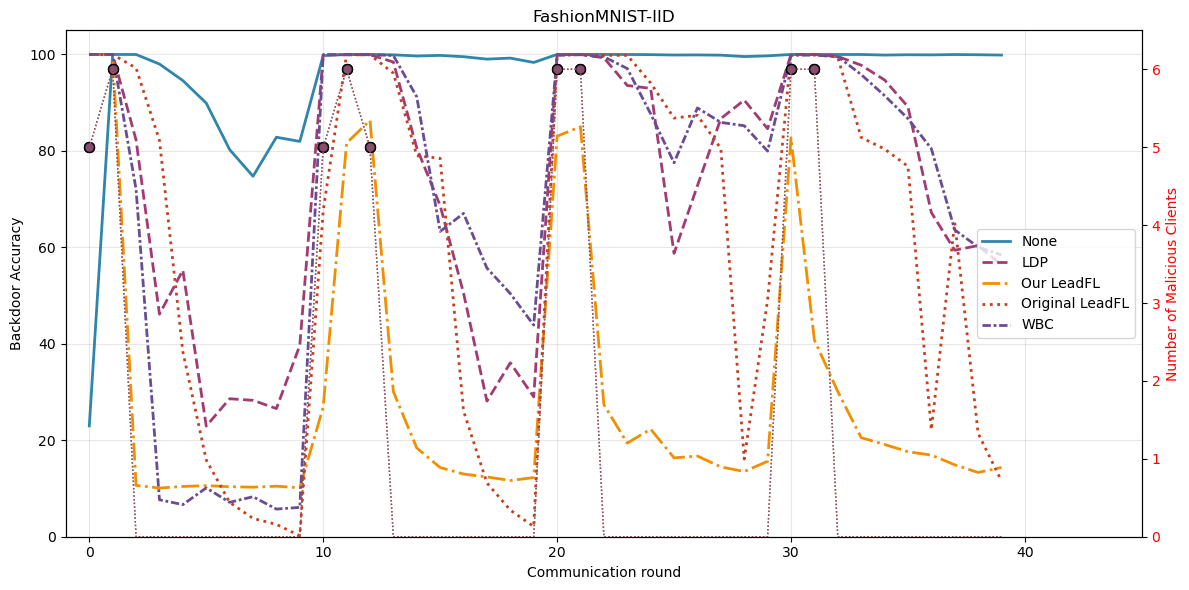

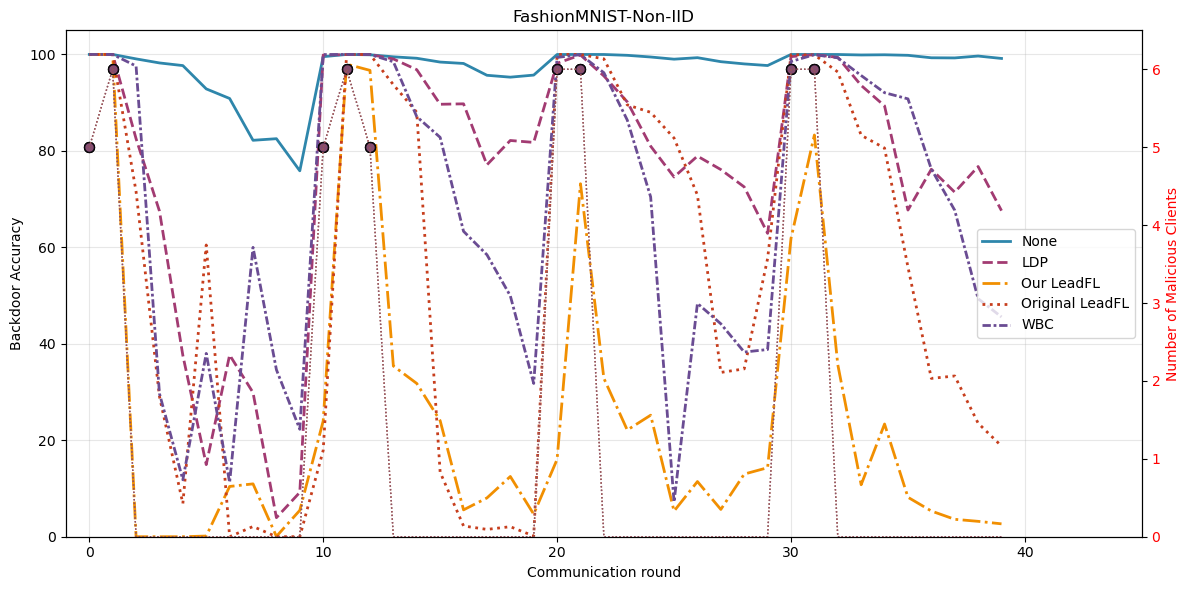


Malicious Client Summary:
Group 1:
  none_40rounds: Malicious clients present in rounds [0, 1, 10, 11, 12, 20, 21, 30, 31]
  LDP_40rounds: Malicious clients present in rounds [0, 1, 10, 11, 12, 20, 21, 30, 31]
  my_leadfl_40rounds: Malicious clients present in rounds [0, 1, 10, 11, 12, 20, 21, 30, 31]
  original_leadfl_iid: Malicious clients present in rounds [0, 1, 10, 11, 12, 20, 21, 30, 31]
  WBC_40rounds: Malicious clients present in rounds [0, 1, 10, 11, 12, 20, 21, 30, 31]

Group 2:
  non_iidNone: Malicious clients present in rounds [0, 1, 10, 11, 12, 20, 21, 30, 31]
  ldp_noniid: Malicious clients present in rounds [0, 1, 10, 11, 12, 20, 21, 30, 31]
  noniid_myleadfl: Malicious clients present in rounds [0, 1, 10, 11, 12, 20, 21, 30, 31]
  noniid_orgleadfl_80: Malicious clients present in rounds [0, 1, 10, 11, 12, 20, 21, 30, 31]
  wbc_noniid: Malicious clients present in rounds [0, 1, 10, 11, 12, 20, 21, 30, 31]


In [ ]:
# Split the folders into two groups (IID and Non-IID)
group1_folders = ["None_iid", "ldp_iid", "my_leadfl_iid", "orgleadfl_iid", "wbc_iid"]
group2_folders = ["None_non_iid", "ldp_noniid", "my_leadfl_non_iid", "org_leadfl_noniid", "wbc_noniid"]

# Define more eye-friendly colors
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A4C93']  # Deep blue, dark magenta, golden orange, brick red, deep purple

# Define different line styles for each dataset
line_styles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1))]  # solid, dashed, dash-dot, dotted, dash-dot-dot

labels = ['None', 'LDP', 'Our LeadFL', 'Original LeadFL', 'WBC']

# Plot Group 1
fig, ax1 = plt.subplots(figsize=(12, 6))

# Left y-axis for backdoor accuracy
for i, folder in enumerate(group1_folders):
    if folder in federator_dataframes:
        df = federator_dataframes[folder]
        rounds = df['round_id']
        backdoor_acc = df['backdoor_accuracy']
        
        # Plot the line with different line styles
        ax1.plot(rounds, backdoor_acc, color=colors[i], label=labels[i], linewidth=2, linestyle=line_styles[i])

ax1.set_xlabel('Communication round')
ax1.set_ylabel('Backdoor Accuracy', color='black')
ax1.set_title('FashionMNIST-IID')
ax1.legend(loc='center right')
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 105)
ax1.set_xlim(-1, 45)

# Right y-axis for number of malicious clients
ax2 = ax1.twinx()
for i, folder in enumerate(group1_folders):
    if folder in federator_dataframes:
        df = federator_dataframes[folder]
        rounds = df['round_id']
        malicious_clients = df['num_malicious_clients']
        
        # Plot malicious clients as thin dotted line
        ax2.plot(rounds, malicious_clients, color=colors[i], linestyle=':', alpha=0.6, linewidth=1)
        
        # Add circles where num_malicious_clients > 0 positioned on the right y-axis
        malicious_mask = df['num_malicious_clients'] > 0
        if malicious_mask.any():
            ax2.scatter(rounds[malicious_mask], malicious_clients[malicious_mask], 
                       color=colors[i], s=50, alpha=0.7, edgecolor='black', linewidth=1)

ax2.set_ylabel('Number of Malicious Clients', color='red')
ax2.set_ylim(0, 6.5)
ax2.tick_params(axis='y', labelcolor='red')

plt.tight_layout()
# Save as High-Res PNG (Print Standard)
plt.savefig('FashionMNIST_IID_results.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot Group 2
fig, ax1 = plt.subplots(figsize=(12, 6))

# Left y-axis for backdoor accuracy
for i, folder in enumerate(group2_folders):
    if folder in federator_dataframes:
        df = federator_dataframes[folder]
        rounds = df['round_id']
        backdoor_acc = df['backdoor_accuracy']
        
        # Plot the line with different line styles
        ax1.plot(rounds, backdoor_acc, color=colors[i], label=labels[i], linewidth=2, linestyle=line_styles[i])

ax1.set_xlabel('Communication round')
ax1.set_ylabel('Backdoor Accuracy', color='black')
ax1.set_title('FashionMNIST-Non-IID')
ax1.legend(loc='center right')
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 105)
ax1.set_xlim(-1, 45)
# Right y-axis for number of malicious clients
ax2 = ax1.twinx()
for i, folder in enumerate(group2_folders):
    if folder in federator_dataframes:
        df = federator_dataframes[folder]
        rounds = df['round_id']
        malicious_clients = df['num_malicious_clients']
        
        # Plot malicious clients as thin dotted line
        ax2.plot(rounds, malicious_clients, color=colors[i], linestyle=':', alpha=0.6, linewidth=1)
        
        # Add circles where num_malicious_clients > 0 positioned on the right y-axis
        malicious_mask = df['num_malicious_clients'] > 0
        if malicious_mask.any():
            ax2.scatter(rounds[malicious_mask], malicious_clients[malicious_mask], 
                       color=colors[i], s=50, alpha=0.7, edgecolor='black', linewidth=1)

ax2.set_ylabel('Number of Malicious Clients', color='red')
ax2.set_ylim(0, 6.5)
ax2.tick_params(axis='y', labelcolor='red')

plt.tight_layout()
# Save as High-Res PNG (Print Standard)
plt.savefig('FashionMNIST_Non-IID_results.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary of malicious client information for each group
print("\nMalicious Client Summary:")
print("Group 1 (IID):")
for folder in group1_folders:
    if folder in federator_dataframes:
        df = federator_dataframes[folder]
        malicious_rounds = df[df['num_malicious_clients'] > 0]['round_id'].values
        print(f"  {folder}: Malicious clients present in rounds {list(malicious_rounds)}")

print("\nGroup 2 (Non-IID):")
for folder in group2_folders:
    if folder in federator_dataframes:
        df = federator_dataframes[folder]
        malicious_rounds = df[df['num_malicious_clients'] > 0]['round_id'].values
        print(f"  {folder}: Malicious clients present in rounds {list(malicious_rounds)}")

In [10]:
import numpy as np

# Create summary table similar to the attachment
def create_summary_table():
    # Initialize the results dictionary
    results = {
        'Method': ['None', 'LDP', 'Our LeadFL', 'Original LeadFL', 'WBC'],
        'IID_MA': [],  # Main Accuracy (test_accuracy) for IID
        'IID_BA_Avg': [],  # Backdoor Accuracy Average for IID
        'IID_BA_Final': [],  # Final Backdoor Accuracy for IID
        'Non_IID_MA': [],  # Main Accuracy (test_accuracy) for Non-IID
        'Non_IID_BA_Avg': [],  # Backdoor Accuracy Average for Non-IID
        'Non_IID_BA_Final': []  # Final Backdoor Accuracy for Non-IID
    }
    
    # Process IID data (group1_folders)
    for i, folder in enumerate(group1_folders):
        if folder in federator_dataframes:
            df = federator_dataframes[folder]
            
            # Latest main accuracy (test_accuracy from last row)
            latest_ma = df['test_accuracy'].iloc[-1]
            results['IID_MA'].append(f"{latest_ma:.1f}")
            
            # Average backdoor accuracy
            avg_ba = df['backdoor_accuracy'].mean()
            results['IID_BA_Avg'].append(f"{avg_ba:.1f}")
            
            # Final backdoor accuracy (last row)
            final_ba = df['backdoor_accuracy'].iloc[-1]
            results['IID_BA_Final'].append(f"{final_ba:.1f}")
        else:
            results['IID_MA'].append("N/A")
            results['IID_BA_Avg'].append("N/A")
            results['IID_BA_Final'].append("N/A")
    
    # Process Non-IID data (group2_folders)
    for i, folder in enumerate(group2_folders):
        if folder in federator_dataframes:
            df = federator_dataframes[folder]
            
            # Latest main accuracy (test_accuracy from last row)
            latest_ma = df['test_accuracy'].iloc[-1]
            results['Non_IID_MA'].append(f"{latest_ma:.1f}")
            
            # Average backdoor accuracy
            avg_ba = df['backdoor_accuracy'].mean()
            results['Non_IID_BA_Avg'].append(f"{avg_ba:.1f}")
            
            # Final backdoor accuracy (last row)
            final_ba = df['backdoor_accuracy'].iloc[-1]
            results['Non_IID_BA_Final'].append(f"{final_ba:.1f}")
        else:
            results['Non_IID_MA'].append("N/A")
            results['Non_IID_BA_Avg'].append("N/A")
            results['Non_IID_BA_Final'].append("N/A")
    
    return pd.DataFrame(results)

# Create and display the original table
summary_table = create_summary_table()
print("Summary Table - FashionMNIST Results")
print("=" * 80)
print(summary_table.to_string(index=False))

# Create transposed table (metrics as rows, methods as columns)
print("\n\nTransposed Table (Attachment Style - Metrics as Rows):")
print("=" * 90)

# Extract data for transposed table
methods = summary_table['Method'].tolist()
iid_ma = summary_table['IID_MA'].tolist()
iid_ba_avg = summary_table['IID_BA_Avg'].tolist()  
iid_ba_final = summary_table['IID_BA_Final'].tolist()
noniid_ma = summary_table['Non_IID_MA'].tolist()
noniid_ba_avg = summary_table['Non_IID_BA_Avg'].tolist()
noniid_ba_final = summary_table['Non_IID_BA_Final'].tolist()

# Print header
print(f"{'':15} {'IID':<45} {'Non-IID':<45}")
print(f"{'':15} ", end="")
for method in methods:
    print(f"{method:<9}", end="")
print(" ", end="")
for method in methods:
    print(f"{method:<9}", end="")
print()
print("-" * 105)

# Print MA row
print(f"{'MA':<15} ", end="")
for val in iid_ma:
    print(f"{val:<9}", end="")
print(" ", end="")
for val in noniid_ma:
    print(f"{val:<9}", end="")
print()

# Print BA Avg row
print(f"{'BA Avg':<15} ", end="")
for val in iid_ba_avg:
    print(f"{val:<9}", end="")
print(" ", end="")
for val in noniid_ba_avg:
    print(f"{val:<9}", end="")
print()

# Print BA Final row
print(f"{'BA Final':<15} ", end="")
for val in iid_ba_final:
    print(f"{val:<9}", end="")
print(" ", end="")
for val in noniid_ba_final:
    print(f"{val:<9}", end="")
print()

print("=" * 90)

# Create transposed DataFrame for CSV export
print("\n\nCreating CSV file...")

# Create column names for the transposed table
iid_columns = [f"IID_{method}" for method in methods]
noniid_columns = [f"Non-IID_{method}" for method in methods]
all_columns = iid_columns + noniid_columns

# Create the transposed data
transposed_data = {
    'Metric': ['MA', 'BA Avg', 'BA Final']
}

# Add IID columns
for i, col_name in enumerate(iid_columns):
    transposed_data[col_name] = [iid_ma[i], iid_ba_avg[i], iid_ba_final[i]]

# Add Non-IID columns  
for i, col_name in enumerate(noniid_columns):
    transposed_data[col_name] = [noniid_ma[i], noniid_ba_avg[i], noniid_ba_final[i]]

# Create DataFrame
transposed_df = pd.DataFrame(transposed_data)

# Save to CSV
csv_filename = os.path.join(base_dir, "summary_results_transposed.csv")
transposed_df.to_csv(csv_filename, index=False)

print(f"✓ Transposed table saved to: {csv_filename}")
print(f"\nTransposed DataFrame preview:")
print(transposed_df.to_string(index=False))

Summary Table - FashionMNIST Results
         Method IID_MA IID_BA_Avg IID_BA_Final Non_IID_MA Non_IID_BA_Avg Non_IID_BA_Final
           None   88.8       95.5         99.9       60.6           97.2             99.2
            LDP   85.0       73.1         56.4       74.3           76.8             67.6
     Our LeadFL   72.9       29.4         14.4       38.1           25.6              2.7
Original LeadFL   86.9       62.2         11.6       73.0           54.3             18.8
            WBC   85.8       70.8         58.4       65.0           68.0             45.6


Transposed Table (Attachment Style - Metrics as Rows):
                IID                                           Non-IID                                      
                None     LDP      Our LeadFLOriginal LeadFLWBC       None     LDP      Our LeadFLOriginal LeadFLWBC      
---------------------------------------------------------------------------------------------------------
MA              88.8     85.0 

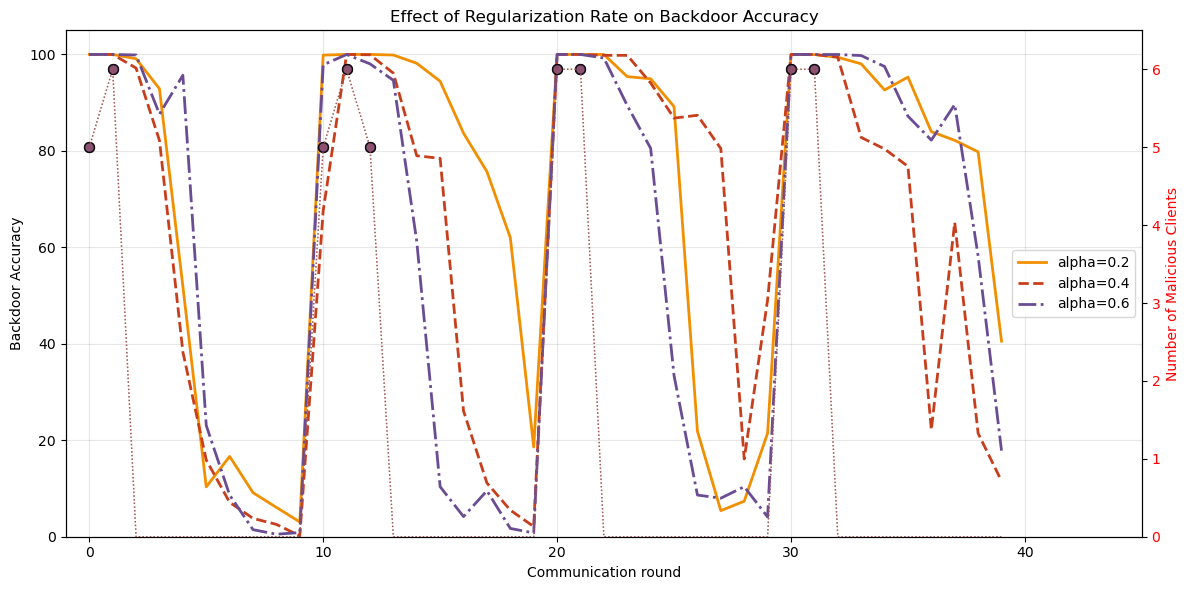

In [ ]:
# Define folders for regularization comparison (all IID with different alpha values)
folders = ["orgleadfl_iid_alpha02", "orgleadfl_iid", "orgleadfl_iid_alpha06"]

# Define more eye-friendly colors
colors = ['#F18F01', '#C73E1D', '#6A4C93']  # golden orange, brick red, deep purple

# Define different line styles for each dataset
line_styles = ['-', '--', '-.']  # solid, dashed, dash-dot

labels = ['alpha=0.2', 'alpha=0.4', 'alpha=0.6']

# Plot Group 1
fig, ax1 = plt.subplots(figsize=(12, 6))

# Left y-axis for backdoor accuracy
for i, folder in enumerate(folders):
    if folder in federator_dataframes:
        df = federator_dataframes[folder]
        rounds = df['round_id']
        backdoor_acc = df['backdoor_accuracy']
        
        # Plot the line with different line styles
        ax1.plot(rounds, backdoor_acc, color=colors[i], label=labels[i], linewidth=2, linestyle=line_styles[i])

ax1.set_xlabel('Communication round')
ax1.set_ylabel('Backdoor Accuracy', color='black')
ax1.set_title('Effect of Regularization Rate on Backdoor Accuracy')
ax1.legend(loc='center right')
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 105)
ax1.set_xlim(-1, 45)

# Right y-axis for number of malicious clients
ax2 = ax1.twinx()
for i, folder in enumerate(folders):
    if folder in federator_dataframes:
        df = federator_dataframes[folder]
        rounds = df['round_id']
        malicious_clients = df['num_malicious_clients']
        
        # Plot malicious clients as thin dotted line
        ax2.plot(rounds, malicious_clients, color=colors[i], linestyle=':', alpha=0.6, linewidth=1)
        
        # Add circles where num_malicious_clients > 0 positioned on the right y-axis
        malicious_mask = df['num_malicious_clients'] > 0
        if malicious_mask.any():
            ax2.scatter(rounds[malicious_mask], malicious_clients[malicious_mask], 
                       color=colors[i], s=50, alpha=0.7, edgecolor='black', linewidth=1)

ax2.set_ylabel('Number of Malicious Clients', color='red')
ax2.set_ylim(0, 6.5)
ax2.tick_params(axis='y', labelcolor='red')

plt.tight_layout()
# Save as High-Res PNG (Print Standard)
plt.savefig('FashionMNIST_regularizationrate_results.png', dpi=300, bbox_inches='tight')
plt.show()

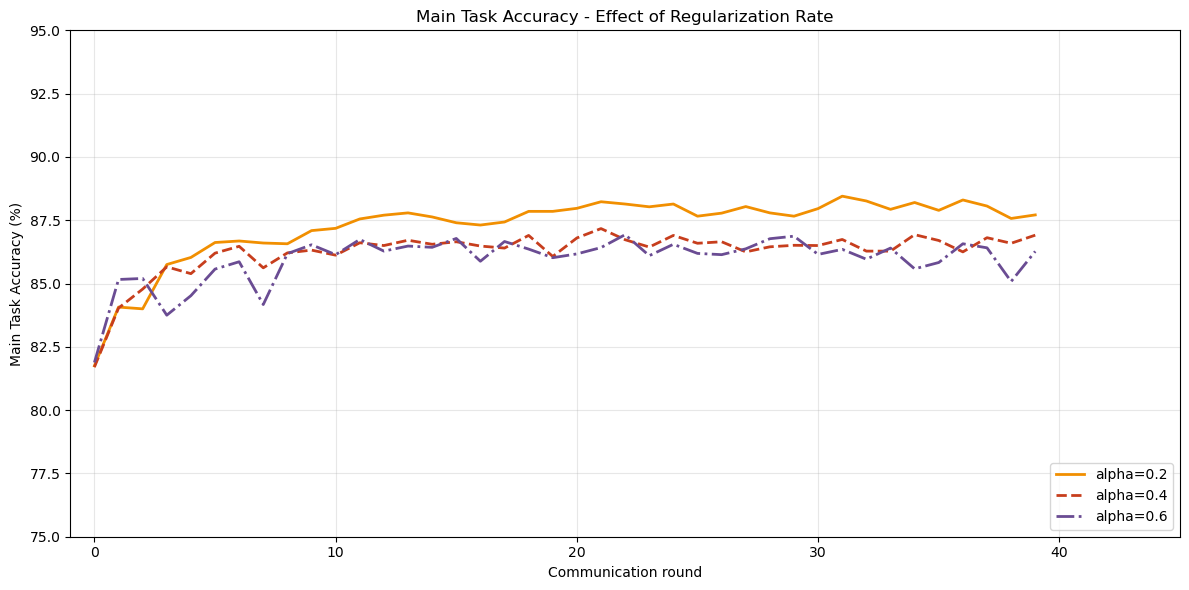

In [ ]:
# Define folders for regularization comparison (all IID with different alpha values)
folders = ["orgleadfl_iid_alpha02", "orgleadfl_iid", "orgleadfl_iid_alpha06"]

# Define more eye-friendly colors
colors = ['#F18F01', '#C73E1D', '#6A4C93']  # golden orange, brick red, deep purple

# Define different line styles for each dataset
line_styles = ['-', '--', '-.']  # solid, dashed, dash-dot

labels = ['alpha=0.2', 'alpha=0.4', 'alpha=0.6']

# Plot Main Task Accuracy for Regularization Rate Comparison
fig, ax = plt.subplots(figsize=(12, 6))

for i, folder in enumerate(folders):
    if folder in federator_dataframes:
        df = federator_dataframes[folder]
        rounds = df['round_id']
        test_acc = df['test_accuracy']
        
        # Plot the main task accuracy
        ax.plot(rounds, test_acc, color=colors[i], label=labels[i], 
               linewidth=2, linestyle=line_styles[i])

ax.set_xlabel('Communication round')
ax.set_ylabel('Main Task Accuracy (%)')
ax.set_title('Main Task Accuracy - Effect of Regularization Rate')
ax.legend(loc='lower right')
ax.grid(True, alpha=0.3)
ax.set_ylim(75, 95)
ax.set_xlim(-1, 45)

plt.tight_layout()
# Save as High-Res PNG (Print Standard)
plt.savefig('FashionMNIST_RegularizationRate_MainTaskAccuracy.png', dpi=300, bbox_inches='tight')
plt.show()